In [ ]:
import pandas as pd

In [ ]:
# Wczytaj
# - metrics.csv
# - model.h5

In [ ]:
data = pd.read_csv('metrics.csv')
data

,Attack Type,Norm,c,Accuracy,Precision,Recall,F1 Score
0,FGSM,Linf,50.000,0.06,0.025191,0.06,0.019750
1,FGSM,Linf,10.000,0.06,0.025191,0.06,0.019750
2,FGSM,Linf,1.000,0.06,0.025191,0.06,0.019750
3,FGSM,Linf,0.300,0.08,0.058191,0.08,0.044824
4,FGSM,Linf,0.100,0.20,0.524390,0.20,0.221430
...,...,...,...,...,...,...,...
63,CW,L0,0.300,0.00,0.000000,0.00,0.000000
64,CW,L0,0.100,0.00,0.000000,0.00,0.000000
65,CW,L0,0.050,0.00,0.000000,0.00,0.000000
66,CW,L0,0.010,0.00,0.000000,0.00,0.000000


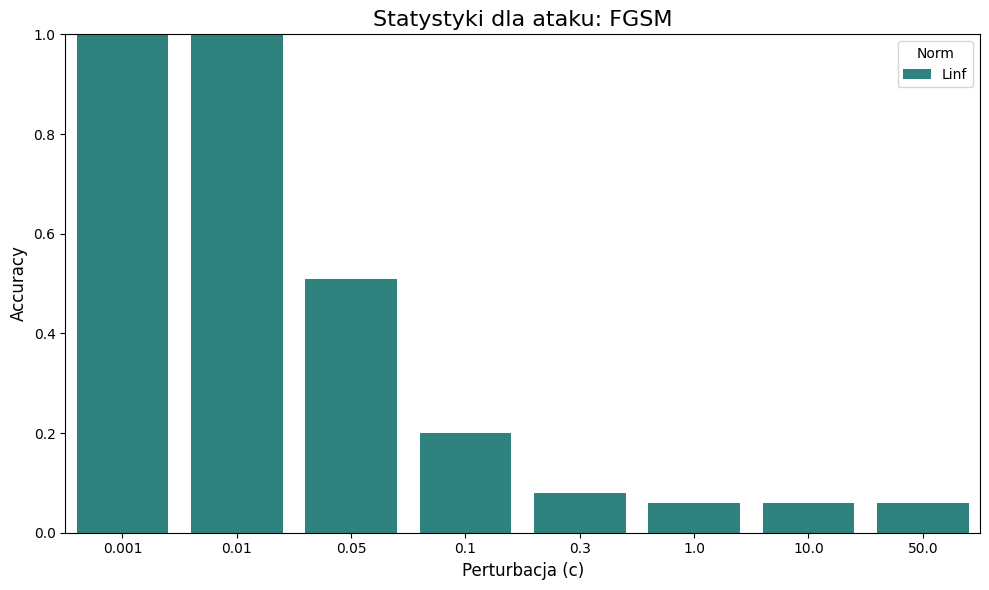

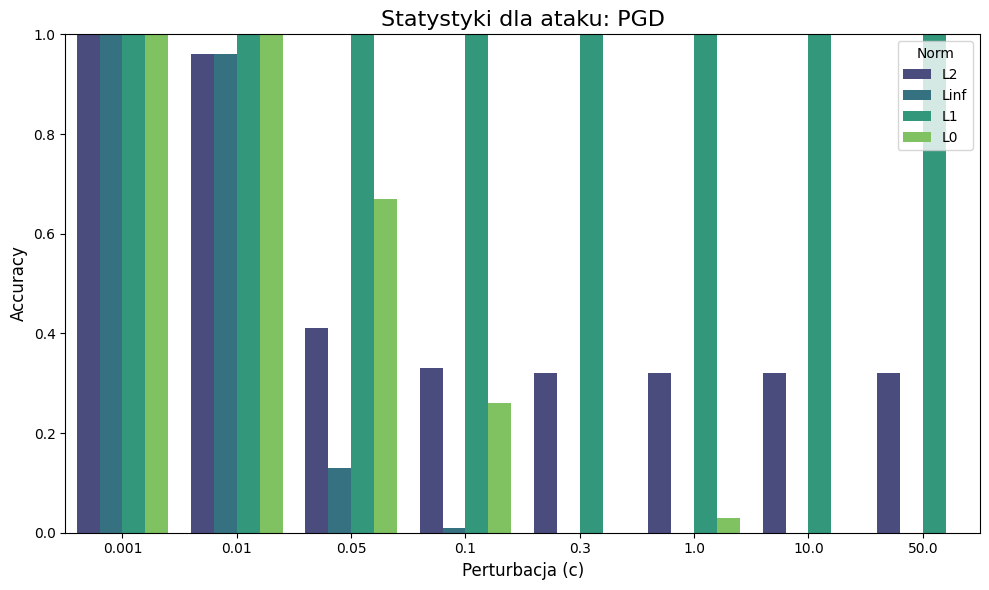

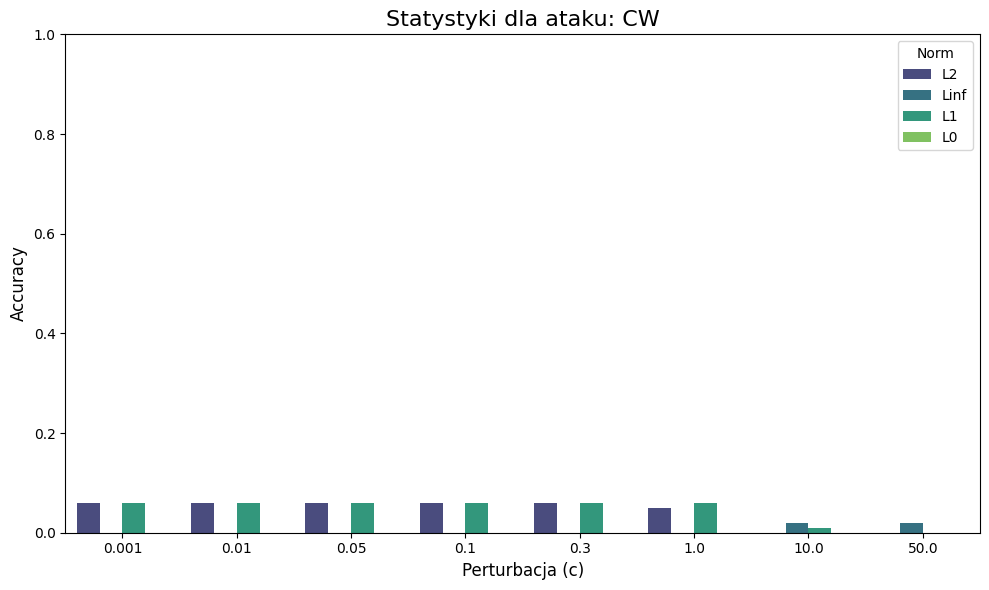

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unikalne typy ataków
attack_types = data['Attack Type'].unique()

# Iteracja przez każdy typ ataku
for attack in attack_types:
    # Filtrowanie danych dla konkretnego typu ataku
    attack_data = data[data['Attack Type'] == attack]

    # Ustawienie rozmiaru wykresu
    plt.figure(figsize=(10, 6))

    # Wykres słupkowy z perturbacją 'c' na osi X i wartością metryki jako wysokością słupków
    sns.barplot(
        data=attack_data,
        x='c',  # Perturbacja na osi X
        y='Accuracy',  # Możesz zmienić na 'Precision', 'Recall' lub 'F1 Score'
        hue='Norm',  # Podział według normy
        palette='viridis'
    )

    # Ustawienie zakresu osi Y
    plt.ylim(0, 1)

    # Tytuł i etykiety osi
    plt.title(f"Statystyki dla ataku: {attack}", fontsize=16)
    plt.xlabel("Perturbacja (c)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)  # Zmień, jeśli używasz innej metryki
    plt.legend(title="Norm", fontsize=10)
    plt.tight_layout()

    # Wyświetlenie wykresu
    plt.show()


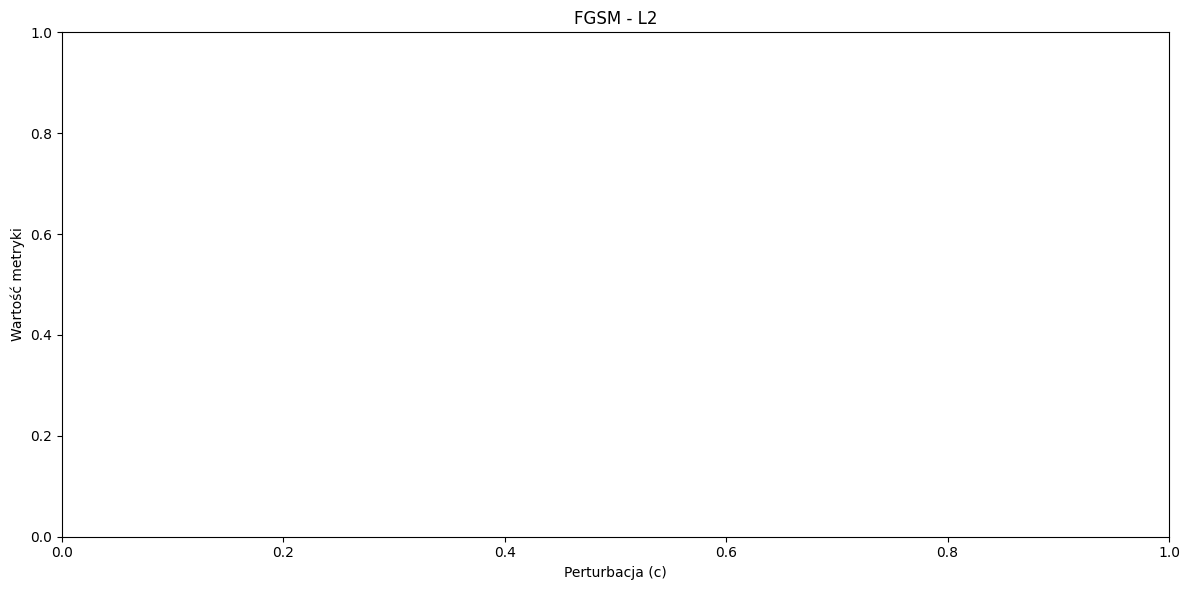

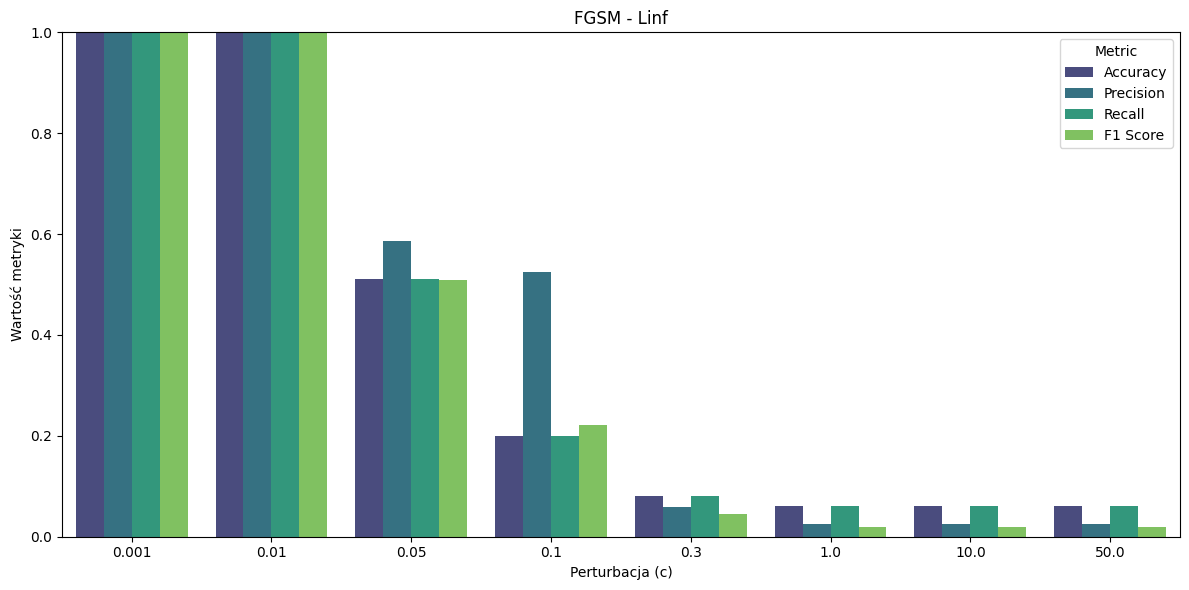

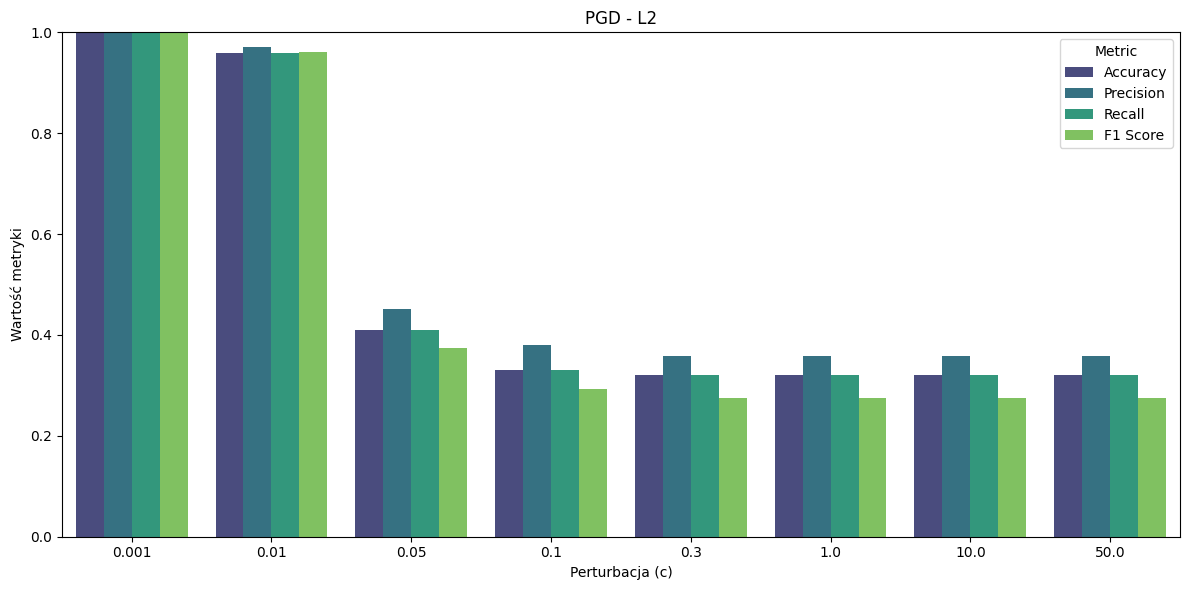

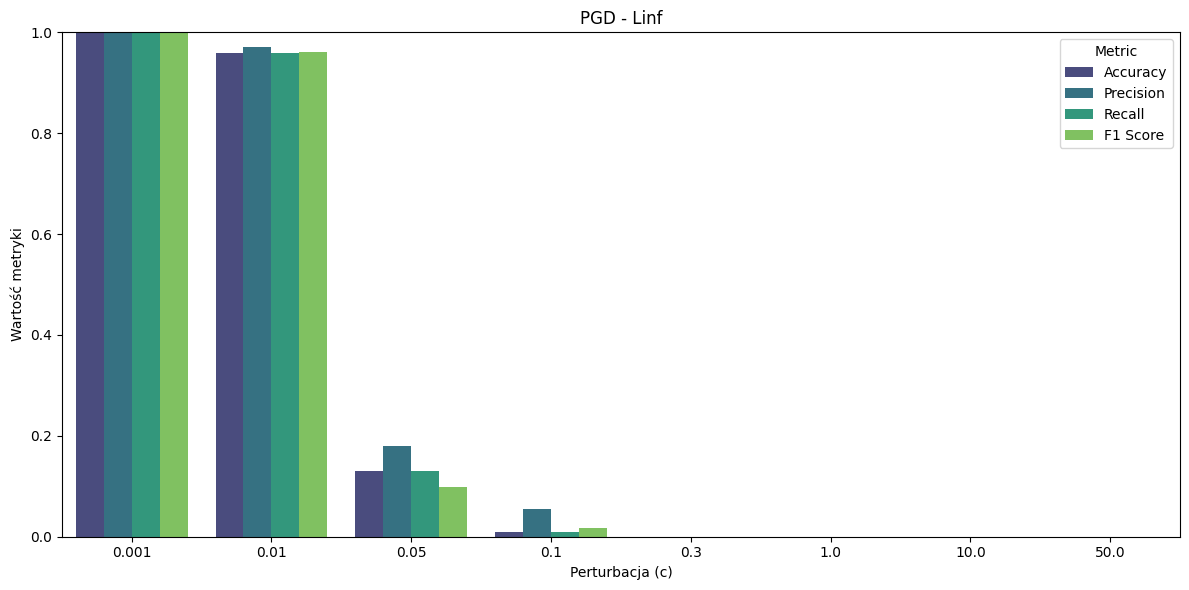

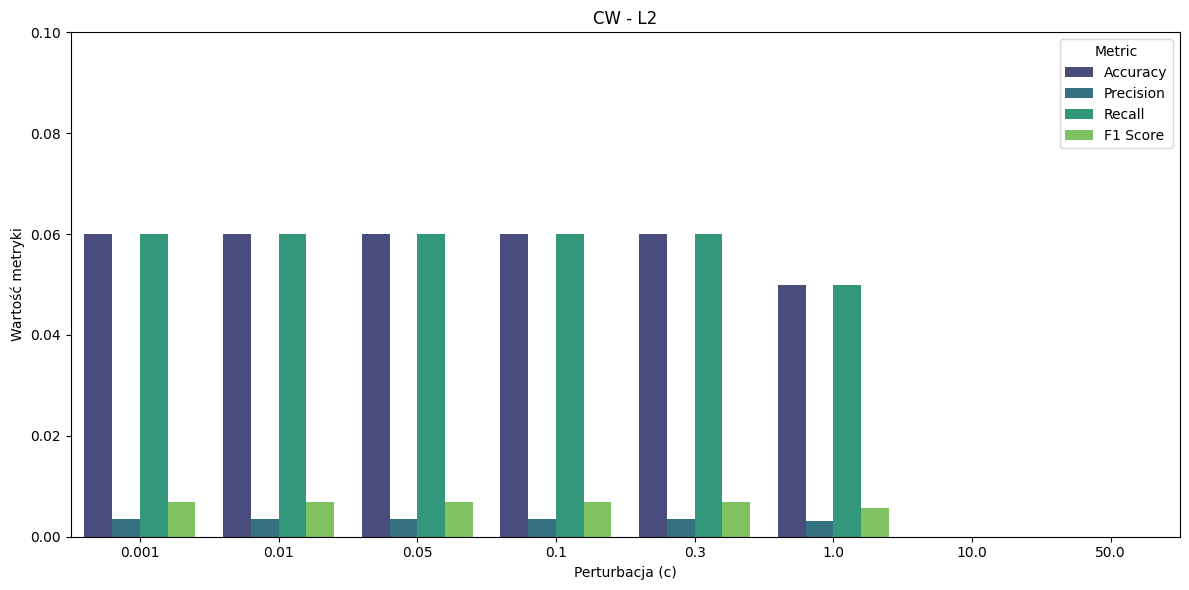

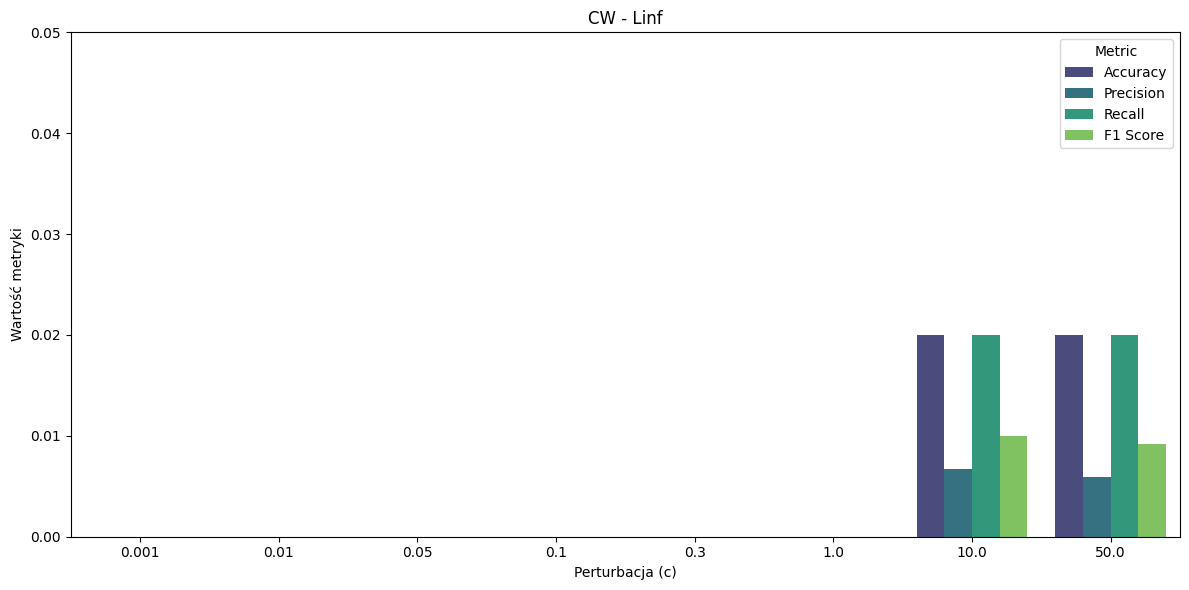

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wybrane typy ataków i normy
attack_types = ['FGSM', 'PGD', 'CW']
norms = ['L2', 'Linf']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Iteracja przez typy ataków i normy
for attack in attack_types:
    for norm in norms:
        # Filtrowanie danych
        filtered_data = data[(data['Attack Type'] == attack) & (data['Norm'] == norm)]

        # Przekształcenie danych do postaci "long"
        melted_data = pd.melt(filtered_data, id_vars=['c'], value_vars=metrics, var_name='Metric', value_name='Value')

        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        sns.barplot(data=melted_data, x='c', y='Value', hue='Metric', palette='viridis')
        plt.title(f"{attack} - {norm}")
        plt.xlabel("Perturbacja (c)")
        plt.ylabel("Wartość metryki")
        plt.tight_layout()

        # Zapisanie wykresu do pliku
        plt.savefig(f"{attack}_{norm}.png")

        plt.show()
